# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

To being, I import the necessary packages and import the data using pandas from the local CSV.

In [124]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('data/human_body_temperature.csv')
data= np.array(df.temperature)

## 1
First, we check to see if the distribution of the temperature data is normally distributed. To do this, I calculate the mean and standard deviation of the sample and use the numpy module random to generate a normally distributed sample to plot. then I plot both the generated and observed samples on the same graph to compare.

As you can see below, **the sample is indeed normally distributed** and it follows the theoretical normal distribution closely.

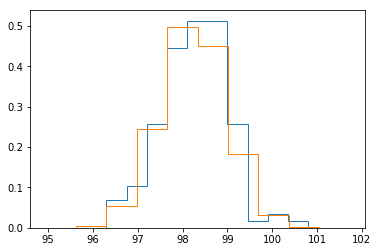

In [125]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
theory = np.random.normal(mean,std,1000000)
_ = plt.hist(df.temperature,normed=True,histtype='step')
_ = plt.hist(theory,normed=True,histtype='step')
plt.show()

## 2
Next, we check the sample size and whether or not these observations are independent of each other. Our sample size is printed below and shows us that we have 130 observations, **a somewhat large sample given the era the experiment was conducted.

**The sample observations are indeed independant as each observation is a unquie participant and none are repeated.** Had each participant been measured repeatedly, it would then have been a dependant sample.

In [126]:
print(df.index)

RangeIndex(start=0, stop=130, step=1)


## 3
To determine the true population mean, I generated 10,000 permutated samples and calculated the mean for each to drop into the array 'mean_reps'. **This will be a 1 sample test as I am comparing a single sample of observations to the mean of the population of means that have been permutated** to determine if it is significantly different. **I chose to conduct a Z-test given that the sample was on the larger side**, however since it is not too large a T-test would likely be fine as well.

Using a significance criteria of p < .05, our p value both tests is not significant no matter how many times you run it (p value will change every time because the permutation sample is different every time it is run). This means that we fail to reject the null hypothesis and thus **the observed mean is likely the true population mean**. Additionally, **the T-test gives us almost the extract same result** up to the 4th decimal place as I suspected given the sample size.

In [127]:
import scipy.stats as stat
from statsmodels.stats.weightstats import ztest

mean_reps = np.empty(10000)
for i in range(10000):
    perm = np.random.choice(df.temperature)
    mean_reps[i] = np.mean(perm)

ztest1 = ztest(x1=data,value=np.mean(mean_reps))
print('Z-test results: ','p=',ztest1[1])

ttest1 = stat.ttest_1samp(data,np.mean(mean_reps))
print(ttest1)

Z-test results:  p= 0.929852196636
Ttest_1sampResult(statistic=0.088030799579446303, pvalue=0.92998870759003871)


## 4
Using only 10 observations, **the T-test would be the appropriate significance test to use**. Running both we can see below that we do get somewhat different p values, however we still come to the same conclusion that the observed mean is not significantly different from the population mean. **This difference illustrates the difference between the Z and T test on samples of different sizes.

In [128]:
from statsmodels.stats.weightstats import ztest
small = data[:10]

test = stat.ttest_1samp(small,np.mean(mean_reps))
print(test)

ztest2 = ztest(x1=small,value=np.mean(mean_reps))
print('Z-test results: ','statistic =',ztest2[0],'p=',ztest2[1])

Ttest_1sampResult(statistic=1.8913108445085098, pvalue=0.091145159625262165)
Z-test results:  statistic = 1.89131084451 p= 0.0585828619192


## 5
Below, I define the confidence interval for abnormal temperatures using the observed data to show the upper and lower limit of 95% of the data as well as the margin of error based on the CLT.

In [129]:
confidence = std*2
print(mean,'F +/-',confidence,'<--margin of error')
print('Abnormal would be anything below',mean-confidence,'or above',mean+confidence)

98.24923076923078 F +/- 1.4607155578100754 <--margin of error
Abnormal would be anything below 96.7885152114207 or above 99.70994632704085


## 6
When the sample is split between mean and women, we get 2 even smaller samples whose size is more appropriate for a 2 sample T-test. The results of this test show us that there is indeed a significant difference in the body temperature between men and women given our p value of .0239

In [130]:
from statsmodels.stats.weightstats import ztest
men = df[df.gender == 'M']
fem = df[df.gender == 'F']
menA= np.array(men.temperature)
femA = np.array(fem.temperature)

ttest3 = stat.ttest_ind(menA,femA)
print(ttest3)
print(np.mean(menA),'\n',np.mean(femA))


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)
98.1046153846 
 98.3938461538
